In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
top_df = pd.read_csv('results/top20_num/csv/RF28_feature_analysis.csv')
top_fi = pd.read_csv('results/top20_num/csv/RF28.csv')

In [7]:
change_df = pd.read_csv('results/e_num_inc_20pct/csv/RF28_feature_analysis.csv')
change_fi = pd.read_csv('results/top20_num/csv/RF28.csv')

,Unnamed: 0,population,poverty_rate,pct_renter_occupied,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,...,eviction_rate_pct_change_3yr_lag_tr,eviction_filing_rate_pct_change_3yr_lag_tr,conversion_rate_pct_change_3yr_lag_tr,eviction_filings_pct_change_5yr_lag_tr,evictions_pct_change_5yr_lag_tr,eviction_rate_pct_change_5yr_lag_tr,eviction_filing_rate_pct_change_5yr_lag_tr,conversion_rate_pct_change_5yr_lag_tr,label_value,score
0,5,1426.0,30.03,69.56,26.23,8.91,64.38,0.0,0.00,0.0,...,5.67010,5.67010,13.80810,45.7627,80.000,62.0553,62.0553,23.488400,1,0.930178
1,13,791.0,33.70,31.34,29.33,6.70,63.97,0.0,0.00,0.0,...,696.72100,696.72100,439.42300,116.6670,142.857,116.9640,116.9640,12.087900,0,0.009275
2,14,1463.0,31.34,48.22,38.76,1.91,58.71,0.0,0.00,0.0,...,1.53846,1.53846,10.00000,-16.6667,0.000,-12.7753,-12.7753,20.000000,0,0.060872
3,31,2802.0,20.00,70.16,24.09,60.92,11.96,0.0,0.36,0.0,...,23.48990,23.48990,-7.78388,136.3640,137.500,102.1980,102.1980,0.480766,1,0.687625
4,43,766.0,4.26,25.66,78.33,17.36,3.00,0.0,0.00,0.0,...,-16.33660,-16.33660,0.00000,150.0000,100.000,45.6897,45.6897,-20.000000,0,0.000157


In [9]:
imp_feat_top = list(top_fi['feature'][0:21])

In [10]:
imp_feat_top

['evictions_lag',
 'eviction_filings_lag',
 'evictions_avg_3yr_lag',
 'evictions_avg_5yr_lag',
 'eviction_filings_avg_5yr_lag',
 'eviction_filings_avg_3yr_lag',
 'evictions_lag_tr',
 'renter_occupied_households_avg_5yr',
 'evictions_avg_5yr_lag_tr',
 'renter_occupied_households',
 'eviction_filing_rate_avg_5yr_lag',
 'evictions_avg_3yr_lag_tr',
 'eviction_filings_lag_tr',
 'eviction_rate_avg_5yr_lag',
 'eviction_rate_lag',
 'eviction_filings_avg_3yr_lag_tr',
 'eviction_filings_avg_5yr_lag_tr',
 'eviction_filing_rate_avg_3yr_lag',
 'eviction_filing_rate_lag',
 'eviction_rate_lag_tr',
 'pct_renter_occupied_avg_5yr']

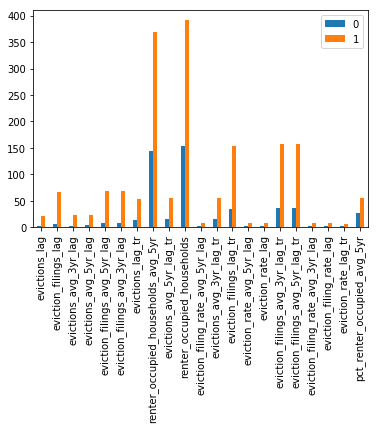

In [20]:
# Difference of means for 20% change outcome
cols_dm = imp_feat_top + ['label_value']

df = top_df[cols_dm]
df_gp = df.groupby(['label_value']).mean()
X = list(df_gp.columns)

Y = df_gp.iloc[0]
Z = df_gp.iloc[1]

dfp = pd.DataFrame(np.c_[Y,Z], index=X)
dfp.plot.bar()
#plt.labels(['0', '1'])

plt.show()

In [21]:
cols_fc = imp_feat_change + ['score']

df_fc = change_df[cols_fc]

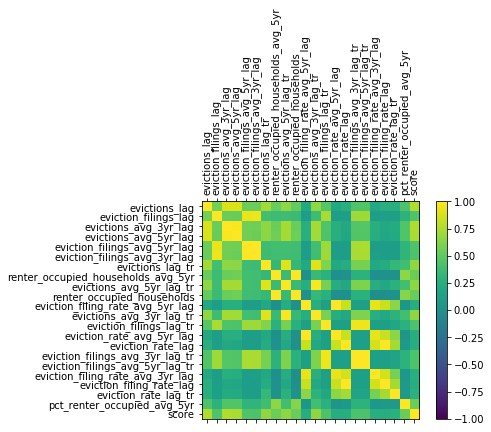

In [23]:
# feature correlation matrix

corr_table = df_fc.corr(method = 'pearson')
names = list(corr_table.index)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_table, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(names),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,  rotation = 90)
ax.set_yticklabels(names)

plt.show()